In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import cv2
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow. keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping  # Use TensorFlow's Keras API directly
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d hemooredaoo/cataract

Dataset URL: https://www.kaggle.com/datasets/hemooredaoo/cataract
License(s): unknown
 99% 548M/552M [00:07<00:00, 88.6MB/s]
100% 552M/552M [00:07<00:00, 72.4MB/s]


In [ ]:
!unzip '/content/cataract.zip'

Archive:  /content/cataract.zip
  inflating: cataract-image-dataset/processed_images/test/cataract/image_246.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_247.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_248.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_249.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_250.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_251.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_252.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_253.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_254.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_255.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_256.png  
  inflating: cataract-image-dataset/processed_images/te

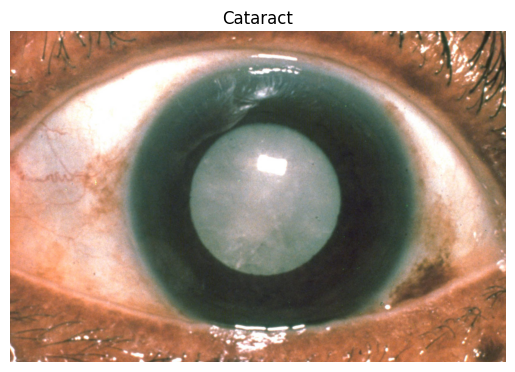

In [ ]:
#Load an image using OpenCV

image_path = '/content/cataract-image-dataset/processed_images/test/cataract/image_246.png'
img = cv2.imread(image_path)

# Convert BGR image to RGB

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib

plt.imshow(img_rgb)

plt.title('Cataract')

plt.axis('off') # Turn off axis labels

plt.show()

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 rotation_range=48,
                                 fill_mode='nearest',
                                 horizontal_flip=True,
                                 shear_range=0.2)

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_directory='/content/drive/MyDrive/ai_tensorflow_projects/cataract-image-dataset/processed_images/train'
test_directory='/content/drive/MyDrive/ai_tensorflow_projects/cataract-image-dataset/processed_images/test'

training_set = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size = (224, 224),
    batch_size = 32,
    class_mode='binary'
    )

test_set = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size = (224, 224),
    batch_size = 32,
    class_mode='binary'
    )

Found 978 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [ ]:
# Load pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet', include_top=False)

# Global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Fully-connected layer
x = Dense(1024, activation='relu')(x)

# Logistic layer (assuming we have 10 classes)
predictions = Dense(1, activation='softmax')(x)

# Model to be trained
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of ResNet50 (optional, for transfer learning)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Print the model summary
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:

# Train the model
model.fit(training_set, validation_data=test_set, epochs=20)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


31/31 [==============================] - 589s 19s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e+00 - val_accuracy: 0.4959
Epoch 2/20
31/31 [==============================] - 38s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e+00 - val_accuracy: 0.4959
Epoch 3/20
31/31 [==============================] - 36s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e+00 - val_accuracy: 0.4959
Epoch 4/20
31/31 [==============================] - 35s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e+00 - val_accuracy: 0.4959
Epoch 5/20
31/31 [==============================] - 36s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e+00 - val_accuracy: 0.4959
Epoch 6/20
31/31 [==============================] - 40s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e+00 - val_accuracy: 0.4959
Epoch 7/20
31/31 [==============================] - 35s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e

In [ ]:

# Fine-tuning: unfreeze some layers of ResNet50
for layer in base_model.layers:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary again after unfreezing the layers
model.summary()




Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
# Continue training
model.fit(training_set, validation_data=test_set, epochs=10)

Epoch 1/10
31/31 [==============================] - 79s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e+00 - val_accuracy: 0.4959
Epoch 2/10
31/31 [==============================] - 38s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e+00 - val_accuracy: 0.4959
Epoch 3/10
31/31 [==============================] - 38s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e+00 - val_accuracy: 0.4959
Epoch 4/10
31/31 [==============================] - 39s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e+00 - val_accuracy: 0.4959
Epoch 5/10
31/31 [==============================] - 39s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e+00 - val_accuracy: 0.4959
Epoch 6/10
31/31 [==============================] - 40s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss: 0.0000e+00 - val_accuracy: 0.4959
Epoch 7/10
31/31 [==============================] - 38s 1s/step - loss: 0.0000e+00 - accuracy: 0.5031 - val_loss

In [ ]:
# Save the fine-tuned model
model.save('/content/drive/MyDrive/ai_tensorflow_projects/fine_tuned_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **MobileNet**

# chat gpt code


In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
# Load the pre-trained MobileNetV2 model without the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

In [ ]:
# Train the model
history = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // training_set.batch_size,
    epochs=15,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size
)

Epoch 1/15
30/30 [==============================] - 400s 13s/step - loss: 0.5267 - accuracy: 0.8097 - val_loss: 0.1454 - val_accuracy: 0.9479
Epoch 2/15
30/30 [==============================] - 89s 3s/step - loss: 0.2533 - accuracy: 0.9123 - val_loss: 0.0981 - val_accuracy: 0.9688
Epoch 3/15
30/30 [==============================] - 78s 3s/step - loss: 0.1954 - accuracy: 0.9228 - val_loss: 0.1251 - val_accuracy: 0.9479
Epoch 4/15
30/30 [==============================] - 78s 3s/step - loss: 0.1545 - accuracy: 0.9450 - val_loss: 0.1292 - val_accuracy: 0.9271
Epoch 5/15
30/30 [==============================] - 81s 3s/step - loss: 0.1496 - accuracy: 0.9503 - val_loss: 0.1729 - val_accuracy: 0.9479
Epoch 6/15
30/30 [==============================] - 75s 3s/step - loss: 0.1447 - accuracy: 0.9471 - val_loss: 0.0928 - val_accuracy: 0.9688
Epoch 7/15
30/30 [==============================] - 79s 3s/step - loss: 0.1426 - accuracy: 0.9419 - val_loss: 0.1682 - val_accuracy: 0.9479
Epoch 8/15
30/30 [

In [ ]:

# Fine-tuning: Unfreeze some layers of the base model
for layer in base_model.layers[-50:]:  # Unfreeze the last 50 layers of the base model
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary again after unfreezing some layers
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
# Continue training for fine-tuning
history_fine_tune = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // training_set.batch_size,
    epochs=10,
    validation_data=test_set,
    validation_steps=test_set.samples
)


Epoch 1/10
30/30 [==============================] - ETA: 0s - loss: 0.2290 - accuracy: 0.9175

30/30 [==============================] - 116s 4s/step - loss: 0.2290 - accuracy: 0.9175 - val_loss: 0.1447 - val_accuracy: 0.9587
Epoch 2/10
30/30 [==============================] - 89s 3s/step - loss: 0.2112 - accuracy: 0.9281
Epoch 3/10
30/30 [==============================] - 91s 3s/step - loss: 0.1539 - accuracy: 0.9376
Epoch 4/10
30/30 [==============================] - 90s 3s/step - loss: 0.1339 - accuracy: 0.9535
Epoch 5/10
30/30 [==============================] - 91s 3s/step - loss: 0.1354 - accuracy: 0.9577
Epoch 6/10
30/30 [==============================] - 90s 3s/step - loss: 0.1225 - accuracy: 0.9556
Epoch 7/10
30/30 [==============================] - 95s 3s/step - loss: 0.1030 - accuracy: 0.9556
Epoch 8/10
30/30 [==============================] - 89s 3s/step - loss: 0.1082 - accuracy: 0.9630
Epoch 9/10
30/30 [==============================] - 87s 3s/step - loss: 0.0924 - accuracy: 0.9725
Epoch 10/10
30/30 [==============================] - 90s 3s/step - loss: 0.0907 - accu

In [ ]:
# Save the fine-tuned model
model.save('fine_tuned_mobilenet.h5')


In [ ]:
# prompt: train the data using MobileNet model

from tensorflow.keras.applications import MobileNetV2

# Load the pre-trained MobileNetV2 model without the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_mobilenet.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // training_set.batch_size,
    epochs=25,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)




Epoch 1/25
30/30 [==============================] - 37s 1s/step - loss: 3.0855 - accuracy: 0.7801 - val_loss: 0.4801 - val_accuracy: 0.8854
Epoch 2/25
30/30 [==============================] - 33s 1s/step - loss: 0.3041 - accuracy: 0.8594 - val_loss: 0.1735 - val_accuracy: 0.9271
Epoch 3/25
30/30 [==============================] - 32s 1s/step - loss: 0.2650 - accuracy: 0.8890 - val_loss: 0.1603 - val_accuracy: 0.9167
Epoch 4/25
30/30 [==============================] - 31s 1s/step - loss: 0.2338 - accuracy: 0.9154 - val_loss: 0.2849 - val_accuracy: 0.9375
Epoch 5/25
30/30 [==============================] - 31s 1s/step - loss: 0.2123 - accuracy: 0.9027 - val_loss: 0.3042 - val_accuracy: 0.9271
Epoch 6/25
30/30 [==============================] - 31s 1s/step - loss: 0.2062 - accuracy: 0.9239 - val_loss: 0.1324 - val_accuracy: 0.9479
Epoch 7/25
30/30 [==============================] - 31s 1s/step - loss: 0.1535 - accuracy: 0.9281 - val_loss: 0.2140 - val_accuracy: 0.9375
Epoch 8/25
30/30 [==

In [ ]:
loss,acc = model.evaluate(test_set)

4/4 [==============================] - 9s 2s/step - loss: 0.1769 - accuracy: 0.9504
